# Statistische Analyse - Mortalität durch Krebs in Deutschland

Mein Name: Anna Schmer

## Hintergrund und Fragestellung

### Hintergrund

Generell hatte ich die Überlegung, wie die Verteilung von Krebsverstorbenen von damals und heute aussieht. Der Mensch setzt sich immer mehr Krebsfördernden Mitteln (Ernährung, Umwelteinflüsse, Chemikalien, usw.) aus. Hat sich sich die Sterblichkeit durch Krebs im Vergleich zu früher verändert? Ich gehe davon aus, dass die Verteilung von damals und heute nicht gleichverteilt ist. Hier möchte ich mein Augenmerk aber nicht nur auf damals und heute legen, sondern auch betrachten, in welchen Altersgruppen und bei welchem Geschlecht das Sterben an Krebs öfter vorkommt.

Ich werde im Folgenden das Jahr 1999 und 2016 untersuchen.

Dies ist eine eine Sekundärstatistik, da das Datenmaterial auf bereits erhobenen Datenmaterial ausgewertet wird.

### Fragestellung

Zielsetzung dieser Arbeit ist es herauszufinden, ob die Verteilung von 1999 zu 2016 gleichverteilt ist oder nicht. 

Frage 1: **Wie war das Verhältnis der Todeszahlen von Frauen und Männern in 1999 im Vergleich zu 2016?**

Frage2: **Ist die Todesanzahl, bezogen auf das Alter in 2016 so verteilt, wie sie es in der Vergangenheit in 1999 einmal war?**

### Hypothese

Hypothesen gehen über den aktuellen Wissensstand hinaus, d.h., mit einer Hypothese wird eine (neue) Vermutung aufgestellt. Hier werde ich den Sachverhalt fiktiv betrachten, da es möglicherweise bereits viele wissenschaftliche Arbeiten dazu gibt, den ich nicht recherchiert habe.

- h0 (Nullhypothese): **Die Verteilung der Sterberate an Krebs ist gleichverteilt (1999 und 2016), bezogen auf die Altersgruppen und dem Geschlecht.**

- h1 (Alternativhypothese): **Die Verteilung der Sterberate an Krebs ist nicht gleichverteilt (1999 und 2016), bezogen auf die Altergruppen und dem Geschlecht.**

### Beschreibung des Datensets

Ich habe den Datensatz auf der Webseite ausgewählt:
https://www.krebsdaten.de/Krebs/SiteGlobals/Forms/Datenbankabfrage/datenbankabfrage_stufe2_form.html, www.krebsdaten.de/abfrage, Letzte Aktualisierung: 17.12.2019, Abrufdatum: (13.06.2020)

Gerne hätte ich 2019 und ein späteres Jahr als 1999 genommen, die Jahre 1999 und 2016 waren aber schon die Grenzjahreszahlen. Aktuellere Datensätze gab es noch nicht.

Der Datensatz beschreibt die Mortalität in Deutschland für das Jahr 2016 und 1999.
Die Altersgruppen sind von 0 - 85+ in 18 Intervallen skaliert. Die Ursache für den Tod war Krebs (gesamt (C00-C97 ohne C44)). Es beinhaltet außerdem das Geschlecht männlich und weiblich.

Das Zentrum für Krebsregisterdaten (ZfKD) schätzt jährlich die Zahl der Krebserkrankungen in Deutschland, die Basis bilden Daten aus den epidemiologischen Krebsregistern der Bundesländer. Da bei jeder Aktualisierung der Inzidenzschätzung der gesamte Datensatz im ZfKD neu analysiert wird, kann es zu (in der Regel leichten) Veränderungen der Ergebnisse gegenüber vorher veröffentlichten Angaben kommen. Dies ist zum Teil durch verspätet eingehende Meldungen bei den Krebsregistern bedingt und zum Teil durch die Methodik der Inzidenzschätzung selbst.
Die Daten zur Krebsmortalität (Sterblichkeit) stammen aus der amtlichen Todesursachenstatistik des Statistischen Bundesamtes. Die Verwendung der Statistiken des Bundesamtes sind lizenz-/gebührenfrei. 

# Visualisierungen und Analyse

In [13]:
import pandas as pd
import numpy as np
import scipy.stats
import scipy.special

In [14]:
Krebsdaten2 = pd.read_csv("/Users/PandyPanda/Desktop/Krebsdaten2.csv", sep=";", decimal=",", encoding ="latin1", header =0, names=["Alter","Ursache","Jahr","weiblich","männlich","leer"])
Krebsdaten2 = Krebsdaten2.drop('leer', axis=1)

In [15]:
newValues = []
for w in Krebsdaten2['weiblich']:
    newValues.append(int(w.replace('.','')))
Krebsdaten2['weiblich'] = newValues
newValues2 = []
for x in Krebsdaten2['männlich']:
    newValues2.append(int(x.replace('.','')))
Krebsdaten2['männlich'] = newValues2

In [16]:
Krebsdaten2 = Krebsdaten2.replace("Krebs gesamt (C00-C97 ohne C44)","Krebs")

In [17]:
columns_sum = Krebsdaten2.sum(axis = 0)
Krebsdaten2 = Krebsdaten2.assign(Fgesamt= columns_sum['weiblich'], Mgesamt= columns_sum['männlich']) 

#Addition von allen Frauen und Männern für den ersten Überblick

In [18]:
sumYear1999Weiblich = []
sumYear2016Weiblich = []
sumYear1999Maennlich = []
sumYear2016Maennlich = []
for year in range(len(Krebsdaten2)):
    if Krebsdaten2['Jahr'][year] == 1999:
        sumYear1999Weiblich.append(int((Krebsdaten2['weiblich'][year])))
        sumYear1999Maennlich.append(int((Krebsdaten2['männlich'][year])))
    elif Krebsdaten2['Jahr'][year] == 2016:
        sumYear2016Weiblich.append(int((Krebsdaten2['weiblich'][year])))
        sumYear2016Maennlich.append(int((Krebsdaten2['männlich'][year])))
Krebsdaten2 = Krebsdaten2.assign(F1999gesamt=sum(sumYear1999Weiblich), F2016gesamt=sum(sumYear2016Weiblich), M1999gesamt=sum(sumYear1999Maennlich), M2016gesamt=sum(sumYear2016Maennlich)) 
Krebsdaten2

#F2016gesamt, M1999gesamt, M2016gesamt, F1999gesamt für Berechnung generiert.

,Alter,Ursache,Jahr,weiblich,männlich,Fgesamt,Mgesamt,F1999gesamt,F2016gesamt,M1999gesamt,M2016gesamt
0,0 - 4,Krebs,1999,43,65,207595,232699,102376,105219,108091,124608
1,0 - 4,Krebs,2016,30,45,207595,232699,102376,105219,108091,124608
2,5 - 9,Krebs,1999,53,78,207595,232699,102376,105219,108091,124608
3,5 - 9,Krebs,2016,41,40,207595,232699,102376,105219,108091,124608
4,10 - 14,Krebs,1999,35,81,207595,232699,102376,105219,108091,124608
5,10 - 14,Krebs,2016,40,34,207595,232699,102376,105219,108091,124608
6,15 - 19,Krebs,1999,61,111,207595,232699,102376,105219,108091,124608
7,15 - 19,Krebs,2016,50,65,207595,232699,102376,105219,108091,124608
8,20 - 24,Krebs,1999,94,144,207595,232699,102376,105219,108091,124608
9,20 - 24,Krebs,2016,41,106,207595,232699,102376,105219,108091,124608


In [92]:
import math

wm1999Alter = []
wm1999FQuote = []
wm1999MQuote = []
wm1999Tod = []
for a in range(len(Krebsdaten2)):
    if Krebsdaten2['Jahr'][a] == 1999:
        wm1999Alter.append(Krebsdaten2['Alter'][a])
        wm1999Tod.append(sum([Krebsdaten2['weiblich'][a], Krebsdaten2['männlich'][a]]))
        wm1999MQuote.append(math.ceil((Krebsdaten2['männlich'][a] / Krebsdaten2['M1999gesamt'][0]) * 100))
        wm1999FQuote.append(math.ceil((Krebsdaten2['weiblich'][a] / Krebsdaten2['F1999gesamt'][0]) * 100))
wm1999 = pd.DataFrame(wm1999Alter, columns=['Alter'])
wm1999['MQuote'] = wm1999MQuote
wm1999['FQuote'] = wm1999FQuote
wm1999['Tod'] = wm1999Tod
print(wm1999)

#Für die Darstellung der Grafiken werden die Daten sortiert und die Quoten für 1999 erstellt


      Alter  MQuote  FQuote    Tod
0     0 - 4       1       1    108
1     5 - 9       1       1    131
2   10 - 14       1       1    116
3   15 - 19       1       1    172
4   20 - 24       1       1    238
5   25 - 29       1       1    396
6   30 - 34       1       1    836
7   35 - 39       1       1   1791
8   40 - 44       2       2   3278
9   45 - 49       3       3   5943
10  50 - 54       5       4   8545
11  55 - 59      10       7  16718
12  60 - 64      14       9  23793
13  65 - 69      16      10  26618
14  70 - 74      18      14  32595
15  75 - 79      16      18  34409
16  80 - 84       9      12  20733
17      85+      11      22  34047


In [91]:
import math

wm2016Alter = []
wm2016FQuote = []
wm2016MQuote = []
wm2016Tod = []
for a in range(len(Krebsdaten2)):
    if Krebsdaten2['Jahr'][a] == 2016:
        wm2016Alter.append(Krebsdaten2['Alter'][a])
        wm2016Tod.append(sum([Krebsdaten2['weiblich'][a], Krebsdaten2['männlich'][a]]))
        wm2016MQuote.append(math.ceil((Krebsdaten2['männlich'][a] / Krebsdaten2['M2016gesamt'][0]) * 100))
        wm2016FQuote.append(math.ceil((Krebsdaten2['weiblich'][a] / Krebsdaten2['F2016gesamt'][0]) * 100))
wm2016 = pd.DataFrame(wm2016Alter, columns=['Alter'])
wm2016['MQuote'] = wm2016MQuote
wm2016['FQuote'] = wm2016FQuote
wm2016['Tod'] = wm2016Tod
print(wm2016)

#Für die Darstellung der Grafiken werden die Daten sortiert und die Quoten für 2016 erstellt

      Alter  MQuote  FQuote    Tod
0     0 - 4       1       1     75
1     5 - 9       1       1     81
2   10 - 14       1       1     74
3   15 - 19       1       1    115
4   20 - 24       1       1    147
5   25 - 29       1       1    260
6   30 - 34       1       1    474
7   35 - 39       1       1    850
8   40 - 44       1       1   1661
9   45 - 49       2       3   4230
10  50 - 54       4       5   8909
11  55 - 59       7       7  14648
12  60 - 64      10       8  20175
13  65 - 69      13      10  25344
14  70 - 74      15      12  29947
15  75 - 79      21      18  44063
16  80 - 84      16      17  36148
17      85+      16      23  42626


[1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 4, 7, 9, 10, 14, 18, 12, 22]


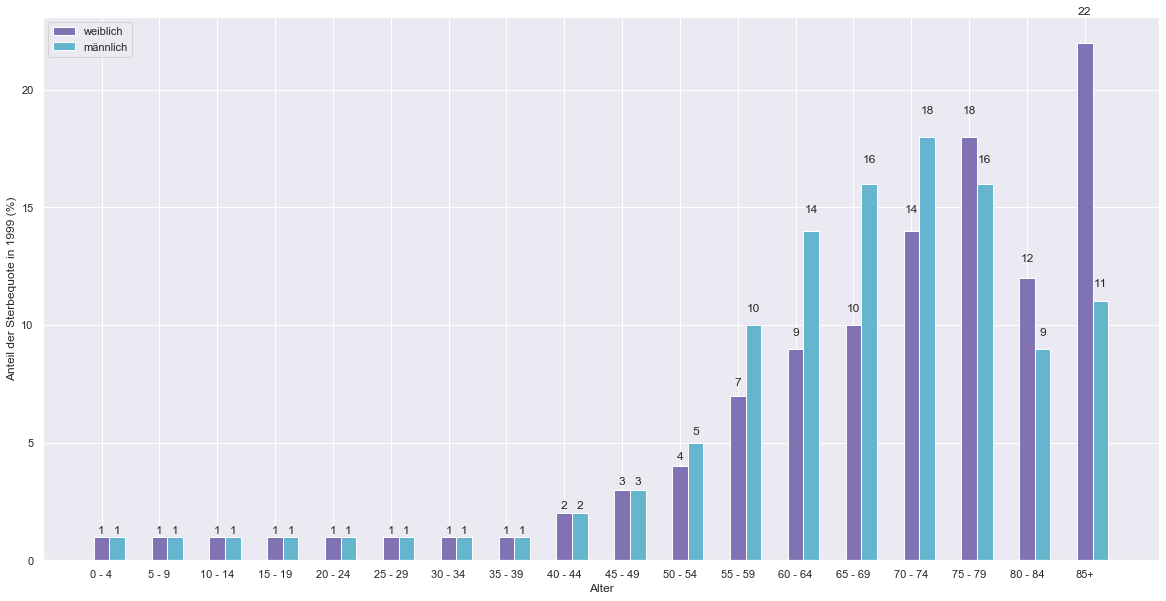

In [81]:
import matplotlib.pyplot as plt

weiblich1999 = []
männlich1999 = []
altersgruppen = []
for a in range(len(wm1999)):
    weiblich1999.append(wm1999['FQuote'][a])
    männlich1999.append(wm1999['MQuote'][a])
    altersgruppen.append(wm1999['Alter'][a])
print(weiblich1999)
N = 3
ind = np.arange(len(weiblich1999))  
width = 0.27       

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

zvals = weiblich1999
kvals = männlich1999
rects2 = ax.bar(ind+width, zvals, width, color='m')
rects3 = ax.bar(ind+width*2, kvals, width, color='c')

ax.set_ylabel('Anteil der Sterbequote in 1999 (%)')
ax.set_xlabel('Alter')
ax.set_xticks(ind+width)
ax.set_xticklabels((altersgruppen))
ax.legend( (rects2[0], rects3[0]), ('weiblich', 'männlich') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')
autolabel(rects2)
autolabel(rects3)


plt.show()

Ich habe die Visualisierungsform Balkendiagramm gewählt, da ich aufzeigen wollte, wie unterschiedlich stark die **Geschlechter in 1999** in einer Altersgruppe von dem Sterben an Krebs betroffen sind. Ich habe Quotienten genutzt, um die Zahlen zueinander ins Verhältnis zu setzen. Außerdem sind die Werte dadurch besser interpretierbar, wenn die Gesamtzahl der Verstorbenen in Beziehung gesetzt werden kann. Durch das Aufrunden der Quote kommt es allerdings zu leichten Abweichungen in der Grafik.

Man sieht, dass Männer ab 50-74 Jahren stärker betroffen sind als Frauen, wohingegen ab 75-85+ die Frauen wieder stärker betroffen sind. Männer haben in 1999 die höchste Quote im Alter von 70-74, hingegen die Frauen im Alter von 85+. Bei jungen Menschen, jedes Geschelchts, abwärts von 39, liegt die Quote bei 1% im Vergleich zu den anderen Altersgruppen.

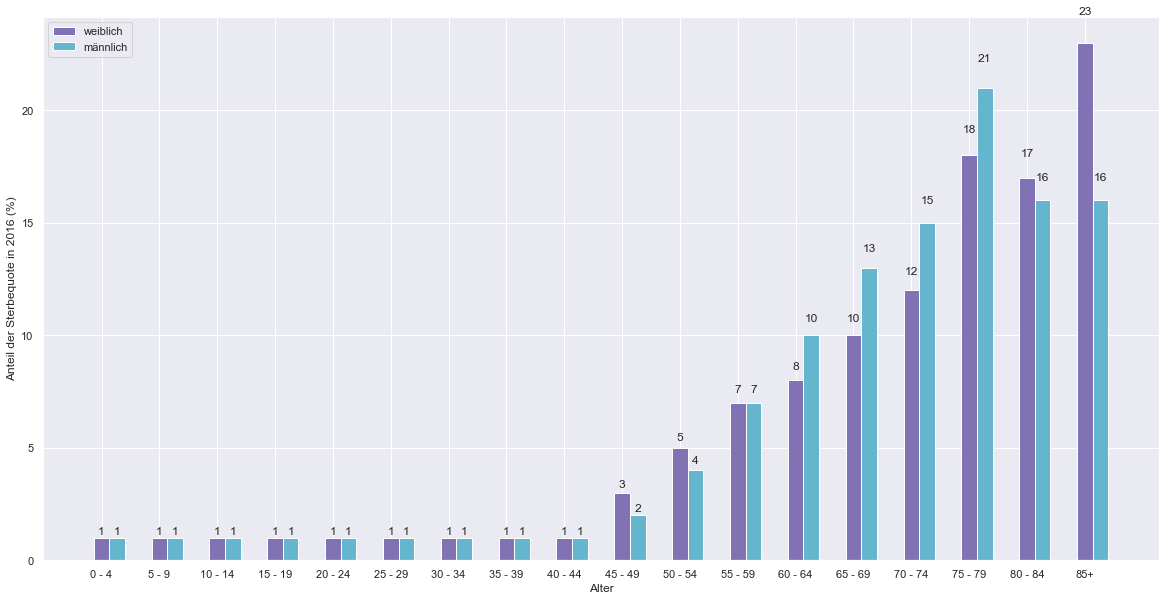

In [82]:
import matplotlib.pyplot as plt

weiblich2016 = []
männlich2016 = []
altersgruppen = []
for a in range(len(wm2016)):
    weiblich2016.append(wm2016['FQuote'][a])
    männlich2016.append(wm2016['MQuote'][a])
    altersgruppen.append(wm2016['Alter'][a])
N = 3
ind = np.arange(len(weiblich2016))  
width = 0.27       

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

zvals = weiblich2016
kvals = männlich2016
rects2 = ax.bar(ind+width, zvals, width, color='m')
rects3 = ax.bar(ind+width*2, kvals, width, color='c')

ax.set_ylabel('Anteil der Sterbequote in 2016 (%)')
ax.set_xlabel('Alter')
ax.set_xticks(ind+width)
ax.set_xticklabels((altersgruppen))
ax.legend( (rects2[0], rects3[0]), ('weiblich', 'männlich') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')
autolabel(rects2)
autolabel(rects3)


plt.show()




In der Grafik sehen wir **Geschlechter in 2016** in einer Altersgruppe und wie stark diese von dem Sterben an Krebs betroffen sind.
Männer ab 60-79 Jahren weichen von den Frauen ab, wohingegen hier im Vergleich zu 1999 die Frauen erst ab 80 viel häufiger an Krebs sterben als die Männer. Auffällig ist auch, dass im Alter von 0-44 die Quote nahe bei 1%, wie in 1999, liegt. Generell kann man schon zu beiden Jahren sagen, dass junge Menschen, jedes Geschlechts eine sehr geringe Sterbequote aufweisen, im Vergleich zu den älteren Menschen.

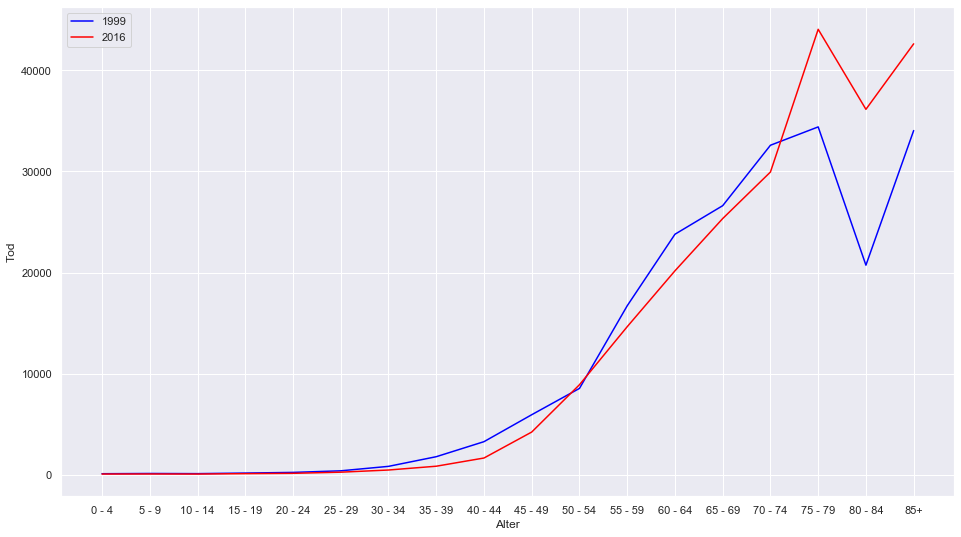

In [94]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
sns.set(style='darkgrid')
sns.set(rc={'figure.figsize':(16,9)})
sns.lineplot(x="Alter", y="Tod", data=wm1999, color='blue', label='1999', sort=False)
sns.lineplot(x="Alter", y="Tod", data=wm2016, color='red', label='2016', sort=False)

Ich habe das Liniendiagramm gewählt, da es mit den Kanten ein Polygonzug darstellt, also eine Visualisierungsfrom, die sich besonders gut für einen Vergleich von Häufigkeiten eignet.

In der Grafik oben sehen wir den Vergleich von verstorbenen Menschen von 1999 und 2016 in einer Altersgruppe und die Anzahl der Mortalität. 
Blau (1999) weicht von rot (2016) in dem Alter von 25-54 ab und die Todeszahl ist in dem Intervall höher als in 2016. Ebenso unterschiedlich ist das Intervall 50-74. Hier sehen wir ebenso, dass 1999 mehr Mortalität aufweist als 2016. Allerdings wird es ab 70-85+ sehr interessant, da in diesem Intervall in 2016 die Mortalität der ältesten Altersgruppen höher ausfällt, als in 1999. Die Unterschiede der Todesanzahlen werden hier besonders deutlich.

## Berechnung Chi2- Anpassungstest

Merkmale:
**Das Alter ist qualitativ, stetig, nicht häufbar und ordinalskaliert.**
**Die Todeszahl in einem Jahr ist in diesm Fall ein qualitatives Merkmal und nominalskaliert.**
**Das Geschlecht ist qualitiativ, diskret, nicht häufbar und nominalskaliert.**

Hier handelt es sich bei allen um manifeste Merkmale, diese könnnen operationalisiert werden, aufgrund der Messbarkeit.

Wir haben hier also eine Nominalskala (Todesanzahl in einem bestimmten Jahr) und Ordinalsakala (Alter) vorliegen.

Es eignet sich, zu Beantwortung meiner Frage und der Verifizierung oder Falsifizierung meiner Hypothese der **Chi2-Anpassungstest.**

Zu erwähnen wäre noch, dass ich das Alter und das Geschlecht gesplittet habe, um genauer in einer Gruppe betrachten zu können, ob die Todeszahlen gleichverteilt sind oder nicht. Denn die Anzahl weicht stark bei den jungen und alten Gruppen ab.

Ich habe unten separiert berechnet: 
- Gruppe 1: 1999, Alter 0-44, weiblich
- Gruppe 2: 1999, Alter 45-85+, männlich
- Gruppe 3: 2016, Alter 0-44, weiblich
- Gruppe 4: 2016, Alter 45-85+, männlich

Der Grund dafür: Die Todesanzahl ist bei sehr jungen Menschen in 1999 und 2016 anders als bei alten Menschen. Außerdem könnte es sein, dass die Hypothese auf eine dieser Gruppen zutrifft und auf andere nicht. Wichtig ist auch zu sehen, ob es möglicherweiße bei dem Geschlecht einen Unterschied gibt.

In [95]:
scipy.stats.chisquare(f_obs=([Krebsdaten2["weiblich"][1],Krebsdaten2["weiblich"][3],Krebsdaten2["weiblich"][5],Krebsdaten2["weiblich"][7],Krebsdaten2["weiblich"][9],Krebsdaten2["weiblich"][11],Krebsdaten2["weiblich"][13],Krebsdaten2["weiblich"][15],Krebsdaten2["weiblich"][17]]), f_exp=([Krebsdaten2["weiblich"][0],Krebsdaten2["weiblich"][2],Krebsdaten2["weiblich"][4],Krebsdaten2["weiblich"][6],Krebsdaten2["weiblich"][8],Krebsdaten2["weiblich"][10],Krebsdaten2["weiblich"][12],Krebsdaten2["weiblich"][14],Krebsdaten2["weiblich"][16]]))


Power_divergenceResult(statistic=736.3318436092368, pvalue=1.074224056865558e-153)

In [96]:
scipy.stats.chisquare(f_obs=([Krebsdaten2["männlich"][1],Krebsdaten2["männlich"][3],Krebsdaten2["männlich"][5],Krebsdaten2["männlich"][7],Krebsdaten2["männlich"][9],Krebsdaten2["männlich"][11],Krebsdaten2["männlich"][13],Krebsdaten2["männlich"][15],Krebsdaten2["männlich"][17]]), f_exp=([Krebsdaten2["männlich"][0],Krebsdaten2["männlich"][2],Krebsdaten2["männlich"][4],Krebsdaten2["männlich"][6],Krebsdaten2["männlich"][8],Krebsdaten2["männlich"][10],Krebsdaten2["männlich"][12],Krebsdaten2["männlich"][14],Krebsdaten2["männlich"][16]]))


Power_divergenceResult(statistic=891.6250504452571, pvalue=3.61669290890367e-187)

In [97]:
scipy.stats.chisquare(f_obs=([Krebsdaten2["weiblich"][19],Krebsdaten2["weiblich"][21],Krebsdaten2["weiblich"][23],Krebsdaten2["weiblich"][25],Krebsdaten2["weiblich"][27],Krebsdaten2["weiblich"][29],Krebsdaten2["weiblich"][31],Krebsdaten2["weiblich"][33],Krebsdaten2["weiblich"][35]]), f_exp=([Krebsdaten2["weiblich"][18],Krebsdaten2["weiblich"][20],Krebsdaten2["weiblich"][22],Krebsdaten2["weiblich"][24],Krebsdaten2["weiblich"][26],Krebsdaten2["weiblich"][28],Krebsdaten2["weiblich"][30],Krebsdaten2["weiblich"][32],Krebsdaten2["weiblich"][34]]))



Power_divergenceResult(statistic=2626.1272994401097, pvalue=0.0)

In [98]:
scipy.stats.chisquare(f_obs=([Krebsdaten2["männlich"][19],Krebsdaten2["männlich"][21],Krebsdaten2["männlich"][23],Krebsdaten2["männlich"][25],Krebsdaten2["männlich"][27],Krebsdaten2["männlich"][29],Krebsdaten2["männlich"][31],Krebsdaten2["männlich"][33],Krebsdaten2["männlich"][35]]), f_exp=([Krebsdaten2["männlich"][18],Krebsdaten2["männlich"][20],Krebsdaten2["männlich"][22],Krebsdaten2["männlich"][24],Krebsdaten2["männlich"][26],Krebsdaten2["männlich"][28],Krebsdaten2["männlich"][30],Krebsdaten2["männlich"][32],Krebsdaten2["männlich"][34]]))



Power_divergenceResult(statistic=23508.2385867099, pvalue=0.0)

# Interpretation
Die Anzahl der Freiheitsgrade ist 8df, da ich jedes Geschlecht, Altersgruppen in 0-44 und 45-89 seperiert betrachtet habe. 
Für jede Gruppe gilt alpha = 0.05, der kritische Wert liegt bei 15.51, da ich immer in 8 Gruppen unterteilt habe.

1. Gruppe, (0-44), weiblich: 736.33 > 15.51
2. Gruppe, (0-44), männlich: 891.63 > 15.51
3. Gruppe, (45-89), weiblich: 2626.13 > 15.51
4. Gruppe, (45-89), männlich: 23508.24 > 15.51

Bei allen Gruppen kann die h0 Hypothese mit starker Sicherheit verworfen werden, da der p-Wert entweder 0.0, 1.07e-153 oder 3.62e-187 beträgt. Außerdem liegt der Wert immer über dem kritischen Wert. Besonders hoch liegt der Wert über dem kritischen Wert bei den Gruppen (45-89), im Vergleich zu den Gruppen (0-44). Wobei die jungen Gruppen auch hohe Werte aufweisen.

Die Annahme der H1 Hypothese führt zur Ablehnung der H0, somit kann man sagen, dass für alle vier Gruppen gilt:

Fazit: **Die Anzahl der an Krebs Verstorbenen, in einer Altersgruppe und dem Geschlecht ist 1999 nicht gleichverteilt, zu der in 2016.
Das bedeutet, dass die Verstorbenen an Krebs, im Vergleich von 1999 und 2016, keiner diskreten Gleichverteilung entsprechen. Die Anteile von 1999 weichen signifikant von den angegebenen Anteilen in 2016 ab. Meine Hypothese wird in diesem Fall bestätigt. H0 wird falsifiziert.**

Dies ist aber kein vollständiger Beweis dafür, dass H1 stimmt, da mehrere Faktoren oder Störfaktoren betrachtet werden müssten. Es könnte durchaus sein, dass einige dieser Verstorbenen andere Krankheiten in Kombination zu Krebs vor ihrem Tod hatten und nicht nur Krebs die Ursache dafür war. Zudem müssten auch Neuerkrankungen und aktuelle Erkrankungen der Jahre betrachtet werden, um sagen zu können, ob sich Krebs auf bestimmte Altersgruppen in dem Jahr 1999 und 2016 auswirkt oder nicht. Hier allerdings ging es nur um die Mortalität.

Das Ergebnis gilt nur für die untersuchten zugrundeliegenden Daten. Außerhalb des Bereiches muss das Ergebnis nicht zwangsläufig gelten. Für die hier dargestellten Daten jedoch schon.
Auch, weist dieses Ergebnis weder auf eine Kausalität hin, noch kann gesagt werden, ob die Verteilung stark oder schwach ist. Dazu würde man nämlich Korrelationen benötigen.

Frage 1 : **Wie war das Verhältnis der Todeszahlen von Frauen und Männern in 1999 im Vergleich zu 2016?**

Männer sind in 1999 von 55-74 häufiger und früher gestorben, als Frauen, die häufiger im Alter von 75-85 betroffen sind. Männer sind 2016 von 60-79 häufiger und früher gestorben, als Frauen, die häufiger im Alter von 80-85 betroffen sind.

**Antwort: Männer sind in 1999 und 2016 früher und häufiger an der Ursache Krebs gestorben, gegenüber den Frauen. Frauen sind anfälliger im spätem älterem Alter an Krebs zu sterben. Hingegen die Männer im spätem mittlerem Alter häufiger an Krebs erliegen, als Frauen.**

Frage 2 : **Ist die Todesanzahl, bezogen auf das Alter in 2016 so verteilt, wie sie es in der Vergangenheit in 1999 einmal war?**

Diese Grafik zeigt auf den ersten Blick, dass Menschen von 30-50 und 54-74 in 1999 häufiger an Krebs gestorben sind als in 2016. Auch scheint es so, dass Menschen in 2016 ab 70 häufiger gestorben sind als in 1999. Man müsste also im Allgemeinen schlussfolgern, dass die Verteilung der Todeszahlen anders von 1999 und 2016 ist. 1999 starben häufiger junge bis ältere Menschen an Krebs, wohingegen in 2016 häufiger sehr alte Menschen zu 1999 an Krebs starben.

**Antwort: Nein, die Verteilung, bezogen auf das Alter ist eine andere, wenn man beide Jahre 1999 und 2016 miteinander vergleicht. Die Verteilung hat sich verschoben. 1999 sind häufiger junge Menschen gestorben und 2016 sind häufiger ältere Menschen gestorben. Es kann natürlich zu einer Verzerrung kommen, da wir heutzutage mehr ältere Menschen in der Population vorfinden, als damals.**

Ich bin an dieser Stelle trotzdem vorsichtig mit der Beantwortung meiner Fragen, da die Ursachen für bestimmte Schwankungen theoretisch auch hier untersucht werden könnten. Diese wurden von mir aber nicht analysiert oder untersucht.

Wichtig zu bedenken ist auch, dass die Bevölkerung gestiegen ist und es daher in Bezug dazu weniger an Krebs gestorbene gibt als damals. Da ich nur die Jahre 2016 und 1999 untersucht habe, kann keine allgemeine Aussage getroffen werden, da man eigentlich auch die Jahre dazwischen betrachten müsste.